# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [ ]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [1]:
%%time

import pandas as pd
import datetime

data_df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
data_df["Data_Value"] *= 0.1 
data_df["Date"] = pd.to_datetime(data_df["Date"])
data_df["Day_Month"] = data_df["Date"].dt.strftime("%m-%d")

## Drop rows which contains data for leap year dates
data_df = data_df.drop(data_df[data_df["Day_Month"]=="02-29"].index)

decade_cond = (data_df["Date"].dt.year < 2015)
data_2015_cond = (data_df["Date"].dt.year == 2015)
tmax_cond = (data_df["Element"]=="TMAX")
tmin_cond = (data_df["Element"]=="TMIN")

decade_max_temp = data_df.loc[decade_cond & tmax_cond].groupby(by="Day_Month").max()
decade_max_temp = decade_max_temp.rename(columns={"Data_Value": "TMAX"}).drop(["Element", "ID"], axis=1)

decade_min_temp = data_df.loc[decade_cond & tmin_cond].groupby(by="Day_Month").min()
decade_min_temp = decade_min_temp.rename(columns={"Data_Value": "TMIN"}).drop(["Element", "ID"], axis=1)

data_2015_max = data_df.loc[data_2015_cond & tmax_cond].groupby(by="Day_Month").max()
data_2015_max = data_2015_max.rename(columns={"Data_Value": "TMAX"}).drop(["Element", "ID"], axis=1)

data_2015_min = data_df.loc[data_2015_cond & tmin_cond].groupby(by="Day_Month").min()
data_2015_min = data_2015_min.rename(columns={"Data_Value": "TMIN"}).drop(["Element", "ID"], axis=1)

# Get decade record high temprature for 2015
condition1 = "(data_2015_max.TMAX > decade_max_temp.TMAX)"
record_2015_high = data_2015_max[pd.eval(condition1)]

# Get decade record low temprature for 2015
condition2 = "(data_2015_min.TMIN < decade_min_temp.TMIN)"
record_2015_low = data_2015_min[pd.eval(condition2)]

Wall time: 6.55 s


<IPython.core.display.Javascript object>


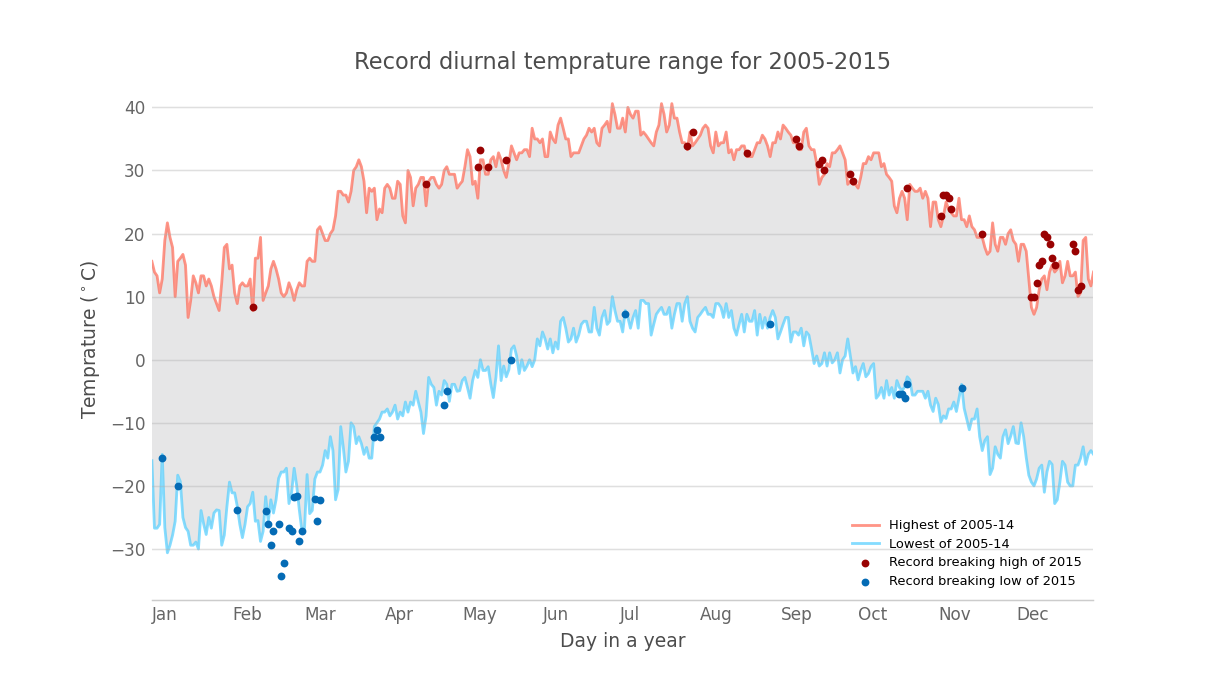

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Set canvas size
plt.figure(figsize=(9,5))

## Plot the line graphs and scatterplots
plt.plot_date(data_2015_min["Date"], decade_max_temp["TMAX"], '-', color='#ff6854', zorder=1, alpha = 0.7, label="Highest of 2005-14")
plt.plot_date(data_2015_min["Date"], decade_min_temp["TMIN"], '-', color='#52ceff', zorder=1, alpha = 0.7, label="Lowest of 2005-14")
plt.scatter(record_2015_high["Date"], record_2015_high["TMAX"], s=10, color="#990202", zorder=2, label="Record breaking high of 2015")
plt.scatter(record_2015_low["Date"], record_2015_low["TMIN"], s=10, color="#046bb5", zorder=2, label="Record breaking low of 2015")

## Define month locator and date formatter to be used for xtick labels
days = mdates.DayLocator()
dayFmt = mdates.DateFormatter('%d')
months = mdates.MonthLocator()
month_fmt = mdates.DateFormatter('%b')

# Get the Axes
ax = plt.gca()
## Define X-axis major locator and the month format to be used for X-axis tick labels
ax.xaxis.set_minor_locator(days)
#ax.xaxis.set_minor_formatter(dayFmt)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(month_fmt)

## Set min and max x-axis tick value(Jan-Dec)
ax.set_xlim(data_2015_min["Date"][0], data_2015_min["Date"][-1])

## Set the horizontalalignment for ticks to left and uncomment to enable label rotation
for label in ax.get_xticklabels():
    #label.set_rotation(25)
    label.set_horizontalalignment('left')

## Set various other tick and tick-label properties
ax.tick_params(axis='both', which=u'both', length=0, labelcolor=[0,0,0,0.6], labelsize=9)

## Enable the grid and set transparency
plt.grid(True, axis='y', alpha = 0.4)

## Shade the area between the line plots
plt.gca().fill_between(data_2015_min["Date"], decade_max_temp["TMAX"], decade_min_temp["TMIN"], facecolor='#aeafb0', alpha=0.30)

## Set X and Y axes labels and an appropiate title for the plot graph
plt.ylabel("Temprature ($^\circ$C)", alpha=0.7)
plt.xlabel("Day in a year", alpha=0.7)
ax.set_title('Record diurnal temprature range for 2005-2015', alpha=0.7)

# Disable all the spine visibility 
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Enable bottom spine visibility and set alpha to 0.2
plt.gca().spines["bottom"].set_visible(True)
plt.gca().spines["bottom"].set_alpha(0.2)

## Set legend properties
plt.legend(loc="lower right", frameon=False, prop={"weight": 12, "size": "x-small"})
